In [27]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

In [2]:
with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\spectral\\darkfield.h5', "r") as f:
    # List all groups
    print(f.keys())
    
    # Get the data
    darkfieldimage = np.array(f[list(f.keys())[0]])

<KeysViewHDF5 ['images', 'std', 'wavelengths']>


In [3]:
with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\spectral\\response.h5', "r") as f:
    # List all groups
    print(f.keys())
    
    # Get the data
    activeimage = np.array(f[list(f.keys())[0]])
    temp = np.array(f[list(f.keys())[2]])

<KeysViewHDF5 ['images', 'std', 'temps', 'wavelengths']>


In [4]:
print('temperature = ' + str(temp[0]) + '\N{DEGREE SIGN}C')

temperature = 33.7°C


In [10]:
np.shape(darkfieldimage)

(100, 256, 320)

In [7]:
waves    = np.linspace(7,13,100);
ymin = 85 #min 0
ymax = 140 #max 256
xmin = 120 #min 0
xmax = 175 #max 320

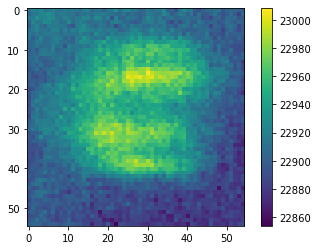

In [8]:
plt.imshow(darkfieldimage[0][ymin:ymax,xmin:xmax])
plt.colorbar()

In [11]:
darkfield = np.zeros(len(activeimage))
for i in range(len(activeimage)):
    darkfield[i] = np.mean(darkfieldimage[i])

In [12]:
for i in range(len(activeimage)):
    image = activeimage - darkfield[i]

In [13]:
response = np.zeros(len(activeimage))
for i in range(len(activeimage)):
    response[i] = np.mean(image[i][ymin:ymax,xmin:xmax])

(100,)

In [23]:
np.shape(activeimage)

(100, 256, 320)

Text(0, 0.5, 'Counts')

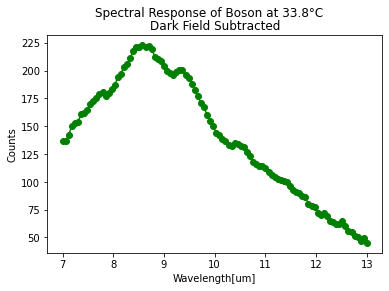

In [21]:
plt.plot(waves,response,'-go')
plt.title('Dark Field Subtracted')
plt.suptitle('Spectral Response of Boson at ' + str(temp[40]) +'\N{DEGREE SIGN}C')
plt.xlabel('Wavelength[um]')
plt.ylabel('Counts')

MovieWriter PillowWriter unavailable; using Pillow instead.


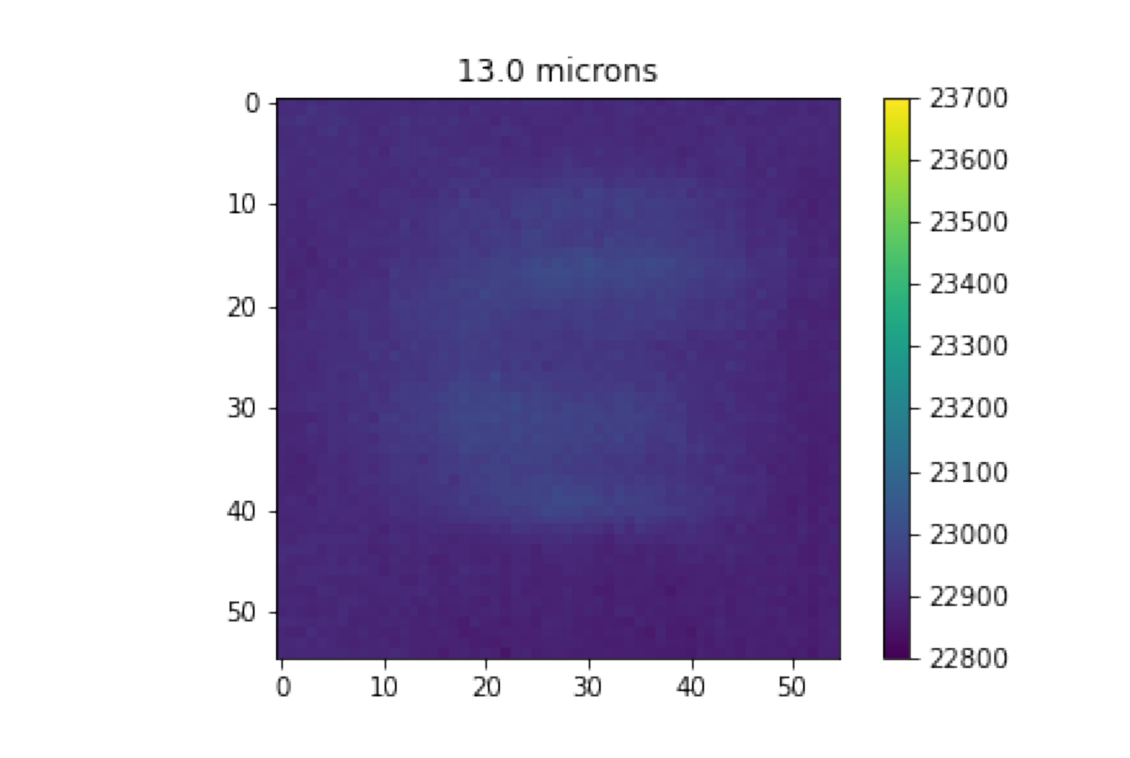

In [29]:
img = activeimage

filenames = []
for i in range(len(activeimage)):
    plt.imshow(img[i,ymin:ymax,xmin:xmax])
    plt.title(str(waves[i]) + ' microns')
    plt.colorbar()
    plt.clim(22800,23700)
    filename = 'img'+str(i)+'.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(img)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\spectral_7_13microns\\imagesanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)